# Data Manipulation and Feature Engineering
For this assignment, let's continue utilizing our previous movies dataset, and explore some more Data manipulation, preparation and feature selection techniques.
#### **Let's get Started!**

# Data Ingestion

For this assignment we will continue working with The movies dataset.

You can download and prepare the dataset from Kaggle, [here](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data?select=movies_metadata.csv).

**Add the missing code!**

Make sure the variable `path_local` contains the correct path to the data.

In [1]:
# Start coding here
path_local = '/example/path/to/file.csv'
# End coding here

**Add the missing code!**

Load the csv-file with the read_csv function from Pandas. Add the right arguments to the function. [Click here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) to see the documentation of read_csv.

In [2]:
import pandas as pd

# Start coding here
movies = pd.read_csv(path_local)#(...)
# End coding here


C:\Users\matbree\AppData\Local\Temp\ipykernel_33868\3923410081.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv(path_local)#(...)


## Import important libraries

In [3]:

%matplotlib inline
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Set sns params
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)


In [4]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Preprocess the 'year' column, as we did in the previous lab, to enrich the data.

In [5]:
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

Now convert the NaT values to NANs and remove those.

In [6]:
movies['year'] = movies['year'].replace('NaT', np.nan)
movies.dropna(subset=['year'], inplace=True)

## Pandas groupby function

The [**`groupby`**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function in Python's `pandas` library groups data based on one or more columns, applying a function to each group and returning a DataFrame with the results. It allows for efficient processing of large datasets by dividing them into smaller groups that can be processed in parallel.

Let's use it to visualize the number of movies released per year. We first group the data by year and then we **aggregate** the title column using pandas `count` function.

<Axes: xlabel='year'>

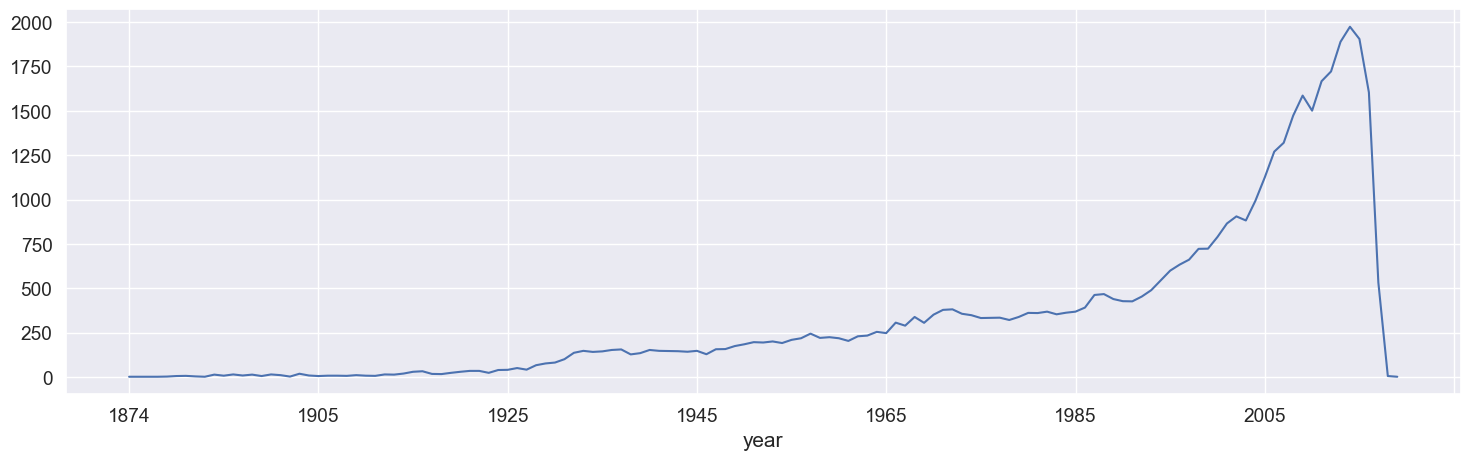

In [7]:
year_count = movies.groupby('year')['title'].count()

plt.figure(figsize=(18,5))
year_count.plot()

**Tip! :** Similar pandas functions like `sum()`, `mean()`, [`aggregate()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) can be used instead of `count()` to explore the data.

**Add the missing code!**

Display the mean revenue per year.

<Axes: xlabel='year'>

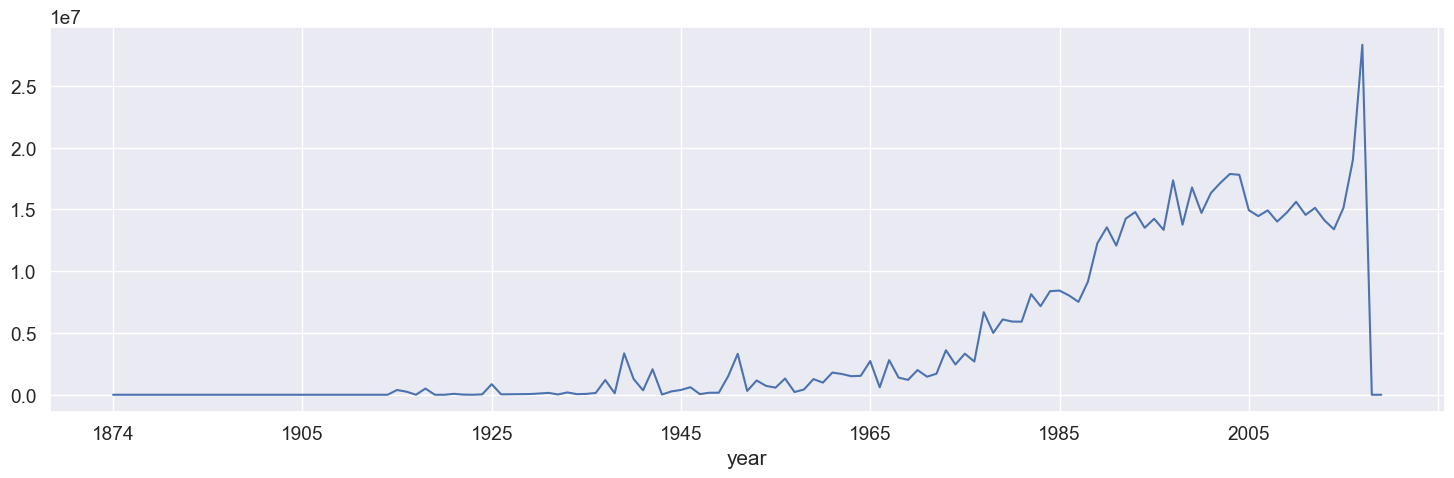

In [8]:
# Start coding here

revenue_mean = None
revenue_mean = movies.groupby('year')['revenue'].mean()

# End coding here

plt.figure(figsize=(18,5))
revenue_mean.plot()

Now let's look at the number of movies that have a revenue of 0.

In [9]:
movies[movies['revenue'] == 0].shape

(37969, 25)

That is a high number of movies. We can assume that a lot of these movies had revenue in the past but this data is missing. Let's replace the 0s with NANs. 

In [10]:
movies['revenue'] = movies['revenue'].replace(0, np.nan)

**Add the missing code**

Now display the revenue per year again. Do you see a big difference?

<Axes: xlabel='year'>

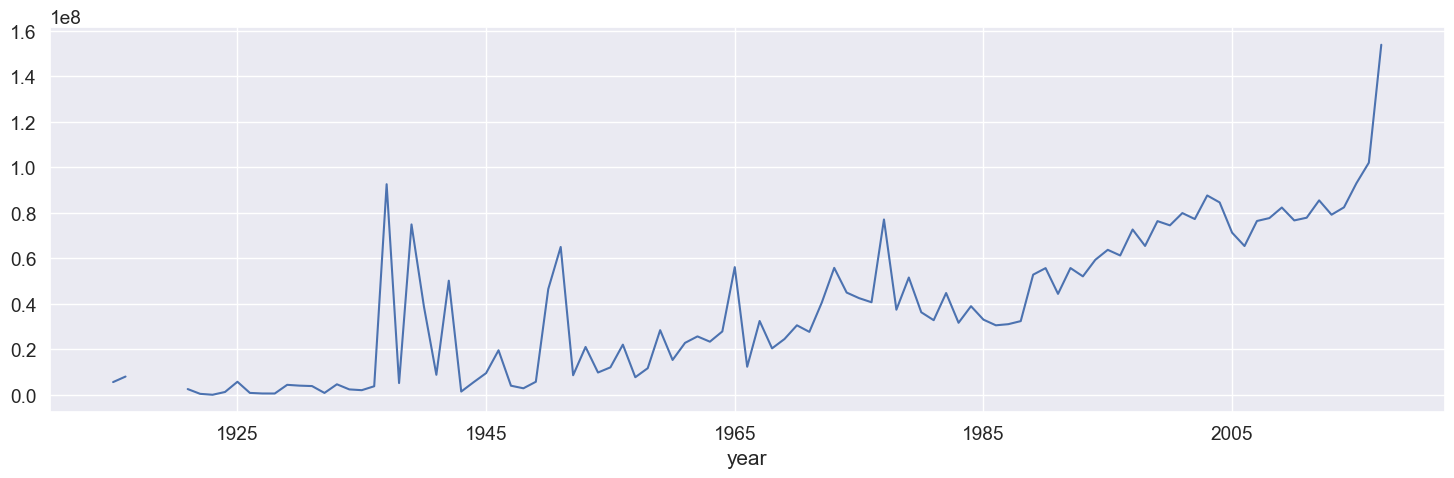

In [11]:
# Start coding here

revenue_mean = movies.groupby('year')['revenue'].mean()

plt.figure(figsize=(18,5))
revenue_mean.plot()

# End coding here

While it's true that we don't have revenue data for the majority of movies in our dataset, we can still check the remaining films that do have reported revenue.

By analyzing this subset of movies, we can identify trends and patterns that may help us make informed decisions about future movie releases revenue.

**Add the missing code**

Replace the 0s with NANs for the `'budget'` column. Afterward, print the NAN values.

In [12]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')

# Start coding here

movies['budget'] = movies['budget'].replace(0, np.nan)
movies[movies['budget'].isnull()].shape

# End coding here

(36490, 25)

The following code adds the `return` column as a new feature. If its value is >1, it represents profit, otherwise a loss if <1.

In [13]:
movies['return'] = movies['revenue'] / movies['budget']
movies.shape

(45376, 26)

In [14]:
movies['return'].describe()

count    5.381000e+03
mean     5.565899e+03
std      2.168566e+05
min      5.217391e-07
25%      7.870443e-01
50%      2.056683e+00
75%      4.244444e+00
max      1.239638e+07
Name: return, dtype: float64

Now, let's see how strong a correlation budget holds with revenue?

Our hypothesis is that a higher budget creates a higher revenue. Let's check the assumption with using the correlation function `.corr()`.

In [15]:
movies['revenue'].corr(movies['budget'])

0.7302708168889315

This shows us that there is definetly some correlation between the two features. Let's display both feature by using a joint plot. In Seaborn, a `jointplot` is a function that creates a multi-panel figure that shows the relationship between two variables, as well as the univariate distributions of each variable. It's particularly useful for exploring the joint distribution of numerical data.

c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

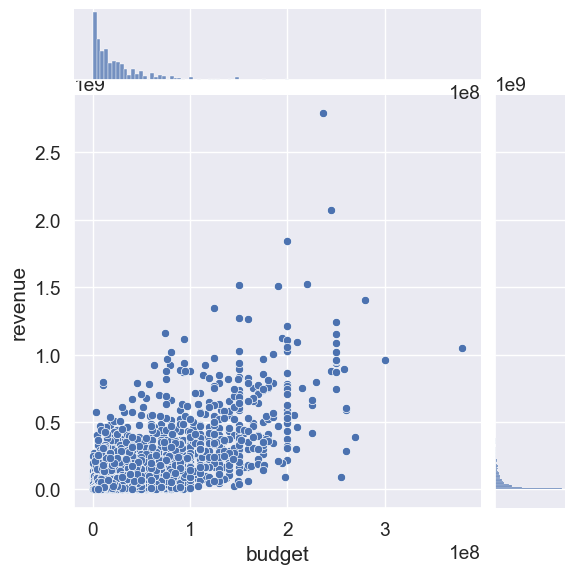

In [16]:
import seaborn as sns

sns.jointplot(x='budget',y='revenue',data=movies[movies['return'].notnull()])

## Add Column after merging credits dataset
Let us now take a look back at the cast and crew file from our movies dataset. We must already have a separate .csv file named *credits*, inside the folder where you downloaded the dataset.

**Add the missing code!**

Make sure the variable `path_credits` contains the correct path to the correct datafile.

In [17]:
# Start coding here
path_credits = '/example/path/to/credits.csv'
# End coding here

**Add the missing code!**

Load the csv-file with the read_csv function from Pandas. Add the right arguments to the function. [Click here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) to see the documentation of read_csv.

In [18]:
# Start coding here
credits = pd.read_csv(path_credits)
credits.head()
# End coding here

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


## Preprocess and merge the datasets together

Let's start by converting the IDs to numeric values. 

In [19]:
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

credits['id'] = pd.to_numeric(credits['id'], errors='coerce')

**Add the missing code**
Merge the `movies` dataset and the `credits` dataset on the column named `id`.

In [20]:
# Start coding here
movies = movies.merge(credits, on='id')
# End coding here

## Working with arrays within a column

Let's look at the feature named crew.

In [21]:
movies['crew']

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
1        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
2        [{'credit_id': '52fe466a9251416c75077a89', 'de...
3        [{'credit_id': '52fe44779251416c91011acb', 'de...
4        [{'credit_id': '52fe44959251416c75039ed7', 'de...
                               ...                        
45446    [{'credit_id': '52fe44439251416c9100a899', 'de...
45447    [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...
45448    [{'credit_id': '52fe4776c3a368484e0c8387', 'de...
45449    [{'credit_id': '533bccebc3a36844cf0011a7', 'de...
45450    [{'credit_id': '593e676c92514105b702e68e', 'de...
Name: crew, Length: 45451, dtype: object

In the function below, we iterate through the array of the row. If we encounter the `job` named `'Director'` we return the `name`. If we don't find any director we return NAN. `ast.literal_eval` is a tool in Python that helps you safely convert a specific kind of text (strings that look like Python code) into actual Python values.

In [22]:
def get_director(x):
    x = ast.literal_eval(x)
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [23]:
movies['director'] = movies['crew'].apply(get_director)

Now we know the directors of the movies let's display the directors with the highest revenue.

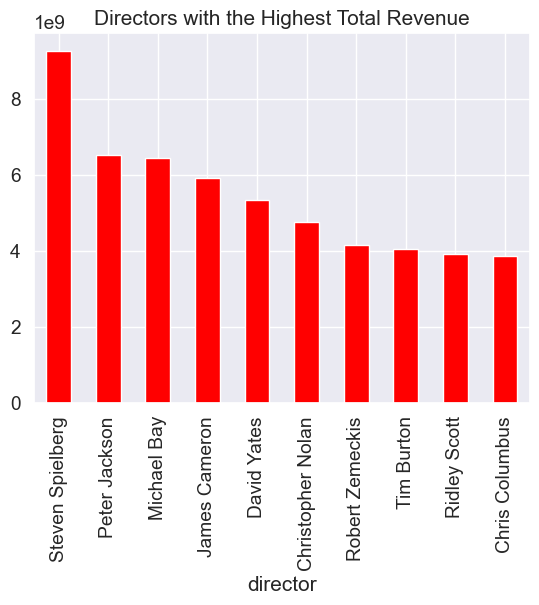

In [24]:

# First we group on the directors and we sum the revenue
directors_summed = movies.groupby('director')['revenue'].sum()

# Now we order the revenue from large to small (descending) and we request the top 10
sorted = directors_summed.sort_values(ascending=False).head(10)

# We add an intuative title
plt.title('Directors with the Highest Total Revenue')

# Now we create a bar plot with an autumn color map
sorted.plot(kind='bar', colormap='autumn')

# Finally we display the bar plot by using the .show() function
plt.show()

## PCA - Principal Component Analysis
The `PCA` class in scikit-learn's (`sklearn`) API is used to perform Principal Component Analysis (PCA) on a dataset. It takes the dataset and returns the transformed data matrix, along with the coefficients of the principal components.

Let's implement them on a sub-set of classes to closely see how it works. Often an important step for PCA but also other types of ML is to remove all NAN values from the dataset.

In [25]:
movies['revenue'] = movies['revenue'].replace(0, np.nan)
movies['budget'] = movies['budget'].replace(0, np.nan)

X = movies.drop(['id', 'adult', 'director', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'video', 'crew','original_language', 'original_title','title', 'cast', 'belongs_to_collection', 'production_companies', 'production_countries','genres','homepage', 'imdb_id','spoken_languages' ], axis=1)
X.dropna(inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5392 entries, 0 to 45408
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        5392 non-null   float64
 1   popularity    5392 non-null   object 
 2   revenue       5392 non-null   float64
 3   runtime       5392 non-null   float64
 4   vote_average  5392 non-null   float64
 5   vote_count    5392 non-null   float64
 6   year          5392 non-null   object 
 7   return        5392 non-null   float64
dtypes: float64(6), object(2)
memory usage: 379.1+ KB


We start with running PCA for the subset that we have. We need to analyse the variance per component in order to know how many features we need to add to our model.

c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:767: Future

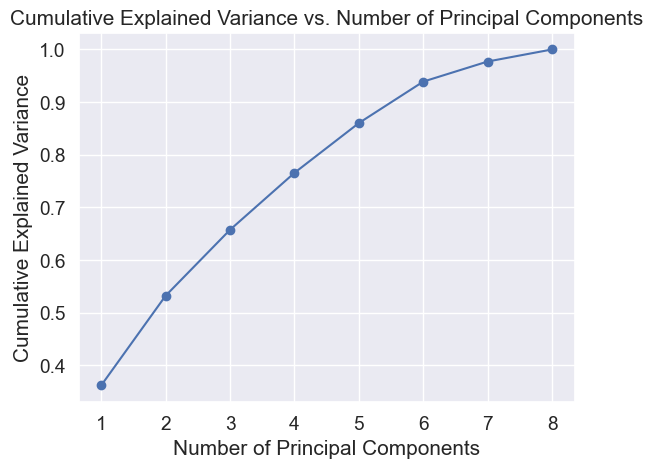

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

Now we see how much variance is explained by each component, we can choose how many components we want to select we creating a ML model.

In [27]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Choose the number of components based on a desired threshold
# For example, let's say you want to retain 90% of the variance
num_components = (pca.explained_variance_ratio_.cumsum() < 0.9).sum() + 1

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, num_components + 1)]
X_pca_df = pd.DataFrame(data=X_pca, columns=columns)
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.130785,0.545804,0.408912,2.143722,0.500307,-1.876761
1,1.858114,0.240505,0.141040,0.712923,-0.271681,-0.588954
2,-0.574479,0.478129,-0.179841,-0.600835,-0.355916,0.381028
3,2.127135,2.291276,-0.419543,-1.268361,0.044643,0.633373
4,-0.624423,-0.501626,0.011764,-0.032328,-0.665321,0.267429


In the dataframe, we can see that the values are not longer understandable. However, we can use these new features for training models but also for visualizing our data.

c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


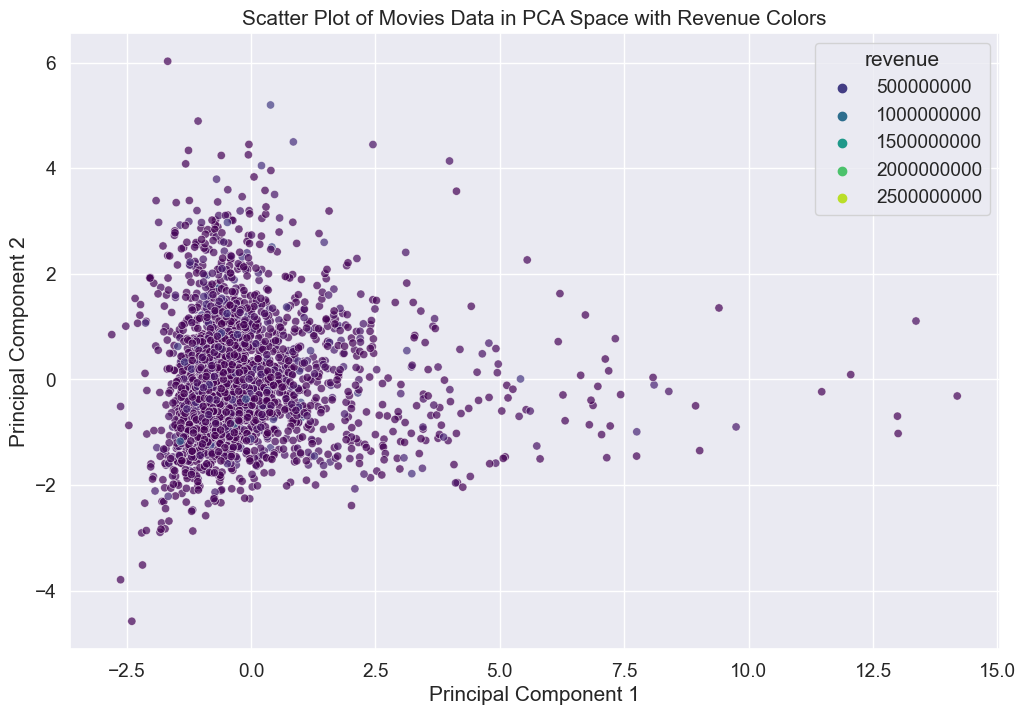

In [28]:
result_df = pd.concat([movies[['id', 'title', 'revenue']], X_pca_df], axis=1)

# Scatter plot of the first two principal components with colors based on revenue
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='revenue', palette='viridis', data=result_df, alpha=0.7)
plt.title('Scatter Plot of Movies Data in PCA Space with Revenue Colors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

## Sampling Techniques
In scikit-learn's `imblearn` module, there are several methods for sampling data, including random sampling, undersampling, and oversampling.

The `imblearn` module in Python provides two sampling modules, `RandomOverSampler` and `RandomUnderSampler`, to perform oversampling or undersampling of the data. `RandomOverSampler` randomly selects instances from the minority class and adds them to the training set, while

`RandomUnderSampler` randomly removes instances from the majority class and sets their labels to zero. These modules can be used to balance the classes in a dataset before training a machine learning model. They are useful for dealing with imbalanced datasets where one class has a significantly larger number of instances than the other.

For the `RandomUnderSampler` we need to use a categorical variable as feature. Let's create one.

In [29]:
movies['profitable'] = movies['return'] > 5
movies['profitable'].value_counts()

profitable
False    44350
True      1101
Name: count, dtype: int64

We can see that the variable is imbalanced. Let's implement `RandomUnderSampler` on a sub-set of features to closely see how it works.

In [30]:
movies_samp = movies.filter(['budget','year','profitable'], axis=1)
movies_samp.dropna(inplace=True)
X_samp, y_samp = movies_samp.drop('profitable', axis=1), movies_samp['profitable']
X_samp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8908 entries, 0 to 45408
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  8908 non-null   float64
 1   year    8908 non-null   object 
dtypes: float64(1), object(1)
memory usage: 208.8+ KB


Now let's try to use over-sampling using the `RandomOverSampler`.

In [31]:
from imblearn.over_sampling import RandomOverSampler

ran_und_samp = RandomOverSampler(random_state=42)
X_resamp, y_resamp = ran_und_samp.fit_resample(X_samp, y_samp)

X_resamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15614 entries, 0 to 15613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  15614 non-null  float64
 1   year    15614 non-null  object 
dtypes: float64(1), object(1)
memory usage: 244.1+ KB


c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Now let's look at how the distribution of the different classes in the variable `profitible` has changed.

In [32]:
print('before', y_samp.value_counts())
print('after', y_resamp.value_counts())


before profitable
False    7807
True     1101
Name: count, dtype: int64
after profitable
True     7807
False    7807
Name: count, dtype: int64


Under-sampling using `RandomUnderSampler` function.

**Add the missing code**

Now implement under sampling for the variable `'profitable'`.

In [33]:
from imblearn.under_sampling import RandomUnderSampler


# Start coding here
ran_und_samp = RandomUnderSampler()
X_resamp, y_resamp = ran_und_samp.fit_resample(X_samp, y_samp)
# End coding here

c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matbree\AppData\Local\mambaforge\envs\week1-env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


**Add the missing code**

Analyse the change of the number of records after under sampling.

In [34]:
# Start coding here
print('before', y_samp.value_counts())
print('after', y_resamp.value_counts())
# End coding here

before profitable
False    7807
True     1101
Name: count, dtype: int64
after profitable
False    1101
True     1101
Name: count, dtype: int64


## Scaling using Sklearn

In the lecture, we looked at scaling. Now let's create a dataset with continuous variables that we can scale.

In [35]:
df = pd.DataFrame({'Hoogte':[630, 620, 620],'Breedte':[2,1,5],'Lengte':[5,5,5]})
df.head()

,Hoogte,Breedte,Lengte
0,630,2,5
1,620,1,5
2,620,5,5


The `StandardScaler` class in scikit-learn's API is used to standardize the features of a dataset. It scales the data by subtracting the mean and dividing by the standard deviation for each feature, which helps improve the performance of machine learning algorithms.

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values)

X_scaled

array([[ 1.41421356, -0.39223227,  0.        ],
       [-0.70710678, -0.98058068,  0.        ],
       [-0.70710678,  1.37281295,  0.        ]])


The `MinMaxScaler` is a feature scaling technique provided by scikit-learn in the sklearn.preprocessing module. It is used to scale and transform numerical features to a specific range, typically between 0 and 1. This type of scaling is also known as min-max scaling.

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.values)

X_scaled

array([[1.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ]])

We need to create a dummy dataset with a categorical variable.

In [38]:
df = pd.DataFrame({'Weersvoorspelling':['Bewolkt', 'Regenachtig', 'Zonnig', 'Bewolkt', 'Zonnig']})
df.head()

,Weersvoorspelling
0,Bewolkt
1,Regenachtig
2,Zonnig
3,Bewolkt
4,Zonnig


The `OneHotEncoder` module in scikit-learn is used to convert categorical variables into numerical features by one-hot encoding. It takes a dataset and a target variable as input, and outputs a new dataset with the one-hot encoded features. This allows machine learning algorithms to handle categorical data more effectively.

In [39]:
from sklearn.preprocessing import OneHotEncoder

scaler = OneHotEncoder()
X_scaled = scaler.fit_transform(df.values)
X_scaled.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

## Scale real data

Now we saw how to scale dummy data. Let's have a look at the movies dataset again. We will start by creating a subset of columns for clarity sake.

In [40]:
subset = movies[['revenue', 'popularity', 'year', 'profitable', 'original_language']]

subset.dropna(inplace=True)

subset['revenue'] = subset['revenue'].astype('int16')
subset['year'] = subset['year'].astype('int16')
subset['popularity'] = subset['popularity'].astype('float16')

subset.head()

C:\Users\matbree\AppData\Local\Temp\ipykernel_33868\1919775848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
C:\Users\matbree\AppData\Local\Temp\ipykernel_33868\1919775848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['revenue'] = subset['revenue'].astype('int16')
C:\Users\matbree\AppData\Local\Temp\ipykernel_33868\1919775848.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,revenue,popularity,year,profitable,original_language
0,-1167,21.953125,1995,True,en
1,-2111,17.015625,1995,False,en
3,-9092,3.859375,1995,True,en
4,-32673,8.390625,1995,False,en
5,3858,17.921875,1995,False,en


In [41]:
cats = subset.select_dtypes(include=['object', 'bool'])
cats.head()

,profitable,original_language
0,True,en
1,False,en
3,True,en
4,False,en
5,False,en


**Add the missing code**

Use the `OneHotEncoder` to transform the variables `cats` into `cats_scaled`.

In [42]:
# Start coding here
scaler = OneHotEncoder()
cats_scaled = scaler.fit_transform(cats.values)
# End coding here
cats_scaled.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [43]:
conts = subset.select_dtypes(exclude=['object', 'bool'])
conts.head()

,revenue,popularity,year
0,-1167,21.953125,1995
1,-2111,17.015625,1995
3,-9092,3.859375,1995
4,-32673,8.390625,1995
5,3858,17.921875,1995


**Add the missing code**

Use the `StandardScaler` to transform the variables `conts` into `conts_scaled`.

In [44]:
# Start coding here
scaler = StandardScaler()
conts_scaled = scaler.fit_transform(conts.values)
# End coding here
conts_scaled

array([[-0.04906469,  1.1070907 , -0.29783803],
       [-0.09969358,  0.7004876 , -0.29783803],
       [-0.47410062, -0.38292933, -0.29783803],
       ...,
       [ 0.9731132 , -0.6264006 ,  0.4113361 ],
       [ 1.279729  , -0.69071645,  0.66921765],
       [-1.5306567 , -0.69747174,  0.47580647]], dtype=float32)

Now let's combine both arrays again. We want this to train a model on both types of variables.

In [45]:
combined = np.hstack((cats_scaled.toarray(), conts_scaled))
combined

array([[ 0.        ,  1.        ,  0.        , ..., -0.04906469,
         1.10709071, -0.29783803],
       [ 1.        ,  0.        ,  0.        , ..., -0.09969358,
         0.70048761, -0.29783803],
       [ 0.        ,  1.        ,  0.        , ..., -0.47410062,
        -0.38292933, -0.29783803],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.97311318,
        -0.62640059,  0.41133609],
       [ 1.        ,  0.        ,  0.        , ...,  1.27972901,
        -0.69071645,  0.66921765],
       [ 1.        ,  0.        ,  0.        , ..., -1.5306567 ,
        -0.69747174,  0.47580647]])

# Homework

For today's homework, we'll once again re-use our use-case, which was **Improving Customer Retention in the Telecommunications Industry**. So, the Objectives and Problem statement is already known to you. If not, you're probably lagging some exploration before you can continue.

### **Assignment**

1. Now that you have explored the dataset, and also have trained basic ML models, can you try to improve the model performance using some powerful techniques talked about in the lecture today?

2. Perform feature-engineering

```
        Are you able to derive useful columns from existing ones?
        How does is it work with Feature selection techniques offered by sklearn?
```


3.   Perform other enrichment techniques like Scaling and PCA

```
        Re-train the models and compare the performance.
        Which techniques are most effective to improve the model performance?
        
```

4.   Take a look at the sklearn documentation and explore the different techniques and models available. For a start, look over [Over-sampling sklearn](https://imbalanced-learn.org/stable/references/over_sampling.html) modules, or [PCA sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) module.

Happy exploring!


